<a href="https://colab.research.google.com/github/Yogita98/tensorflow-model-deployment/blob/master/column_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
# !cat /var/log/colab-jupyter.log

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATADIR = ""

CATEGORIES = ["label1", "label2", "labeln"]

In [ ]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # iterate over each image per label
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
     break  #...and one more!

In [ ]:
print(img_array)

In [ ]:
print(img_array.shape)

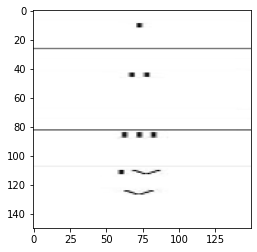

In [ ]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to the labels
        class_num = CATEGORIES.index(category)  # get the classification 
        # print(class_num)

        for img in tqdm(os.listdir(path)):  # iterate over each image per label
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 74/74 [00:00<00:00, 328.23it/s]

986


In [ ]:
import random

random.shuffle(training_data)


In [ ]:
# for sample in training_data[:10]:
#     print(sample[1])

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

X = X/255.0

model = Sequential()

model.add(Conv2D(512, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 512)     5120      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 512)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 512)       2359808   
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 512)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 512)       0         
_________________________________________

In [ ]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)


Train on 788 samples, validate on 198 samples
Epoch 1/10
788/788 [==============================] - 1275s 2s/sample - loss: 2.3068 - acc: 0.6954 - val_loss: 0.2233 - val_acc: 0.9293
Epoch 2/10
788/788 [==============================] - 1287s 2s/sample - loss: 0.3550 - acc: 0.8731 - val_loss: 0.1973 - val_acc: 0.9343
Epoch 3/10
788/788 [==============================] - 1308s 2s/sample - loss: 0.2123 - acc: 0.9226 - val_loss: 0.0919 - val_acc: 0.9697
Epoch 4/10
788/788 [==============================] - 1308s 2s/sample - loss: 0.1706 - acc: 0.9454 - val_loss: 0.1182 - val_acc: 0.9495
Epoch 5/10
788/788 [==============================] - 1263s 2s/sample - loss: 0.1333 - acc: 0.9619 - val_loss: 0.1078 - val_acc: 0.9596
Epoch 6/10
788/788 [==============================] - 1273s 2s/sample - loss: 0.1040 - acc: 0.9683 - val_loss: 0.2490 - val_acc: 0.9242
Epoch 7/10
788/788 [==============================] - 1247s 2s/sample - loss: 0.0965 - acc: 0.9721 - val_loss: 0.0634 - val_acc: 0.9798
Ep

In [ ]:
model.save('column-classification-CNN.model')

In [ ]:
import cv2
import tensorflow as tf

CATEGORIES = ["Amount", "Captions", "Sr.No"]


def prepare(img1_array):
    IMG_SIZE = 150  
    # img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    # plt.imshow(img_array, cmap='gray')  # graph it
    # plt.show()
    new_array = cv2.resize(img1_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# count=10
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path 
    count=10
    for img in os.listdir(path):  # iterate over each image per label
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        prediction = model.predict([prepare(img_array)])
        print(prediction)
        for i in range(len(prediction[0])):
          if prediction[0][i] == 1:
            print(CATEGORIES[int(list(prediction[0]).index(1))])
        count-=1
        if count==0:
          break 


In [ ]:
# for category in CATEGORIES:  
#     path = os.path.join(DATADIR,category)  
#     for img in os.listdir(path):  # iterate over each image
#         img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
#         new_array = cv2.resize(img_array, (200,150))  
#         # plt.imshow(img_array, cmap='gray')  # graph it
#         plt.imshow(new_array, cmap='gray')  # graph it
#         plt.show()  # display!

#         break  # we just want one for now so break
# #     break  #...and one more!

In [ ]:
# IMG_SIZE = 50

# new_array = cv2.resize(img_array, (200,150))
# plt.imshow(new_array, cmap='gray')
# plt.show()

In [ ]:
# IMG_SIZE = 150
# new_array = cv2.resize(img_array, (200, 150))
# training_data = []

# def create_training_data():
#     for category in CATEGORIES:  # do dogs and cats

#         path = os.path.join(DATADIR,category)  # create path to dogs and cats
#         class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
#         print(class_num)

#         for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
#             try:
#                 img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#                 new_array = cv2.resize(img_array, (200, 150))  # resize to normalize data size
#                 training_data.append([new_array, class_num])  # add this to our training_data
#             except Exception as e:  # in the interest in keeping the output clean...
#                 pass
#             #except OSError as e:
#             #    print("OSErrroBad img most likely", e, os.path.join(path,img))
#             #except Exception as e:
#             #    print("general exception", e, os.path.join(path,img))

# create_training_data()

# print(len(training_data))

In [ ]:
# import random
# random.shuffle(training_data)


In [ ]:
# X = []
# y = []

# for features,label in training_data:
#     X.append(features)
#     y.append(label)

# print(X[0].reshape(-1, 200, 150, 1))

# X = np.array(X).reshape(-1, 200, 150, 1)
# print(y)

In [ ]:
X = X/255.0

model_1 = Sequential()

model_1.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(256, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model_1.add(Dense(64))

model_1.add(Dense(3))
model_1.add(Activation('softmax'))

model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 690 samples, validate on 296 samples
Epoch 1/10
690/690 [==============================] - 400s 580ms/sample - loss: 4.5820 - acc: 0.5507 - val_loss: 0.7920 - val_acc: 0.6385
Epoch 2/10
690/690 [==============================] - 397s 576ms/sample - loss: 0.6918 - acc: 0.7188 - val_loss: 0.5927 - val_acc: 0.7939
Epoch 3/10
690/690 [==============================] - 397s 575ms/sample - loss: 0.5791 - acc: 0.7696 - val_loss: 0.5494 - val_acc: 0.7804
Epoch 4/10
690/690 [==============================] - 396s 574ms/sample - loss: 0.5235 - acc: 0.7768 - val_loss: 0.5715 - val_acc: 0.7770
Epoch 5/10
690/690 [==============================] - 396s 574ms/sample - loss: 0.4446 - acc: 0.8145 - val_loss: 0.5580 - val_acc: 0.7770
Epoch 6/10
690/690 [==============================] - 396s 573ms/sample - loss: 0.4003 - acc: 0.8203 - val_loss: 0.5189 - val_acc: 0.7838
Epoch 7/10
690/690 [==============================] - 397s 575ms/sample - loss: 0.3545 - acc: 0.8464 - val_loss: 0.6364 - val_

KeyboardInterrupt: ignored